<a href="https://colab.research.google.com/github/Pathway2008/wind-m-s-/blob/main/wind%2Bauto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('/content/drive/MyDrive/wind(m s)/train.csv')
test = pd.read_csv('/content/drive/MyDrive/wind(m s)/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/wind(m s)/sample_submission.csv')

In [ ]:
train.head()

,ID,월,일,측정 시간대,섭씨 온도(°⁣C),절대 온도(K),이슬점 온도(°C),상대 습도 (%),대기압(mbar),포화 증기압(mbar),실제 증기압(mbar),증기압 부족량(mbar),수증기 함량 (g/kg),공기 밀도 (g/m**3),풍향 (deg),풍속 (m/s)
0,TRAIN_00000,7,2,저녁,13.97,287.78,9.84,76.1,992.08,15.98,12.16,3.82,7.66,1198.06,155.60,1.61
1,TRAIN_00001,8,21,오전,16.94,290.85,12.14,73.3,991.07,19.33,14.17,5.16,8.94,1183.67,177.00,1.68
2,TRAIN_00002,11,1,저녁,9.76,283.84,5.40,74.2,988.71,12.10,8.98,3.12,5.67,1213.22,146.20,0.73
3,TRAIN_00003,12,28,오전,5.27,277.30,2.71,83.5,1014.25,8.89,7.43,1.47,4.57,1265.48,264.50,2.71
4,TRAIN_00004,9,26,오후,17.35,290.86,12.68,74.0,995.77,19.84,14.68,5.16,9.22,1187.40,19.34,1.00


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36581 entries, 0 to 36580
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              36581 non-null  object 
 1   월               36581 non-null  int64  
 2   일               36581 non-null  int64  
 3   측정 시간대          36581 non-null  object 
 4   섭씨 온도(°⁣C)      36581 non-null  float64
 5   절대 온도(K)        36581 non-null  float64
 6   이슬점 온도(°C)      36581 non-null  float64
 7   상대 습도 (%)       36581 non-null  float64
 8   대기압(mbar)       36581 non-null  float64
 9   포화 증기압(mbar)    36581 non-null  float64
 10  실제 증기압(mbar)    36581 non-null  float64
 11  증기압 부족량(mbar)   36581 non-null  float64
 12  수증기 함량 (g/kg)   36581 non-null  float64
 13  공기 밀도 (g/m**3)  36581 non-null  float64
 14  풍향 (deg)        36581 non-null  float64
 15  풍속 (m/s)        36581 non-null  float64
dtypes: float64(12), int64(2), object(2)
memory usage: 4.5+ MB


In [ ]:
train.describe()

,월,일,섭씨 온도(°⁣C),절대 온도(K),이슬점 온도(°C),상대 습도 (%),대기압(mbar),포화 증기압(mbar),실제 증기압(mbar),증기압 부족량(mbar),수증기 함량 (g/kg),공기 밀도 (g/m**3),풍향 (deg),풍속 (m/s)
count,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.000000,36581.00000,36581.000000
mean,6.511468,15.648561,9.992694,283.971095,5.453064,75.827418,990.032953,14.037167,9.786895,4.250224,6.178010,1214.580682,176.58240,2.036446
std,3.458678,8.803467,8.237177,8.354235,6.327009,16.089188,8.824477,8.075680,4.185701,5.191128,2.655054,39.528520,84.38269,1.544146
min,1.000000,1.000000,-13.930000,258.870000,-15.560000,23.640000,956.890000,2.070000,1.810000,0.000000,1.120000,1110.650000,0.01000,0.100000
25%,4.000000,8.000000,3.650000,277.700000,0.450000,65.360000,985.100000,7.940000,6.310000,0.950000,3.980000,1184.030000,129.40000,0.920000
50%,7.000000,16.000000,9.130000,283.170000,5.070000,79.000000,990.250000,11.590000,8.770000,2.250000,5.520000,1214.650000,199.50000,1.630000
75%,9.000000,23.000000,16.350000,290.370000,10.950000,89.200000,995.700000,18.620000,13.100000,5.410000,8.270000,1241.600000,233.90000,2.700000
max,12.000000,31.000000,34.340000,308.620000,20.150000,100.000000,1015.300000,54.270000,23.640000,41.230000,14.980000,1349.460000,360.00000,11.890000


In [ ]:
train = train.drop(['ID'],axis=1)

In [ ]:
import warnings
import matplotlib.font_manager as fm
warnings.filterwarnings('ignore')
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 129824 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


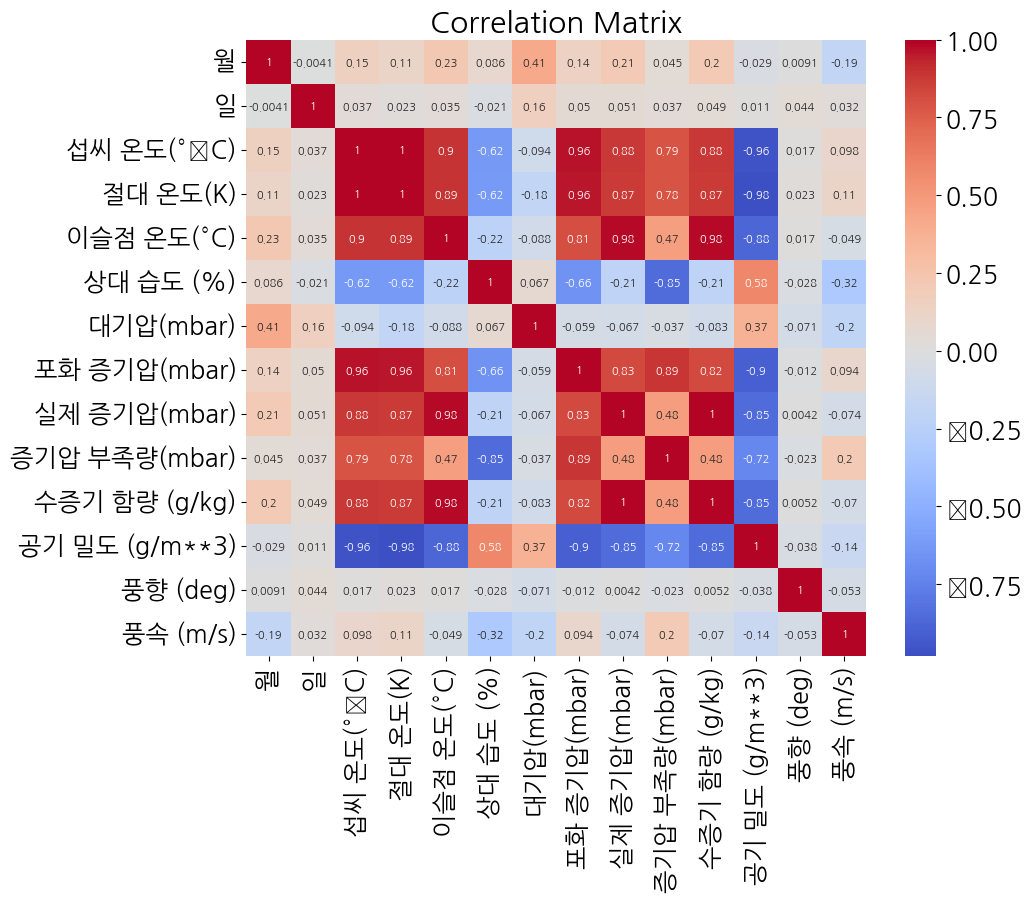

In [ ]:
corr = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0,annot_kws={'size': 8})
plt.title('Correlation Matrix')
plt.show()

In [ ]:
wind_stats_by_month = train.groupby('월')['풍속 (m/s)'].agg(['max', 'min', 'mean'])
wind_stats_by_month

,max,min,mean
월,,,
1,10.84,0.17,2.337930
2,11.89,0.12,2.925407
3,9.26,0.16,2.346679
4,10.99,0.13,2.206959
5,8.43,0.12,2.229903
6,8.79,0.13,1.738113
7,8.19,0.12,1.874379
8,7.90,0.12,1.848094
9,9.10,0.10,1.522968


In [ ]:
import matplotlib.pyplot as plt

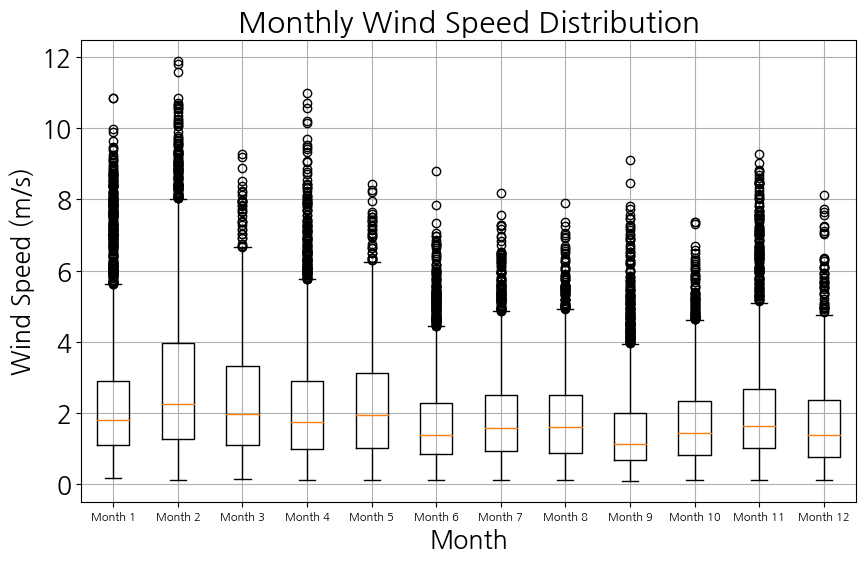

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([train[train['월'] == month]['풍속 (m/s)'] for month in range(1, 13)],
            labels=[f'Month {month}' for month in range(1, 13)])
plt.tick_params(axis='x', labelsize=8)
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.title('Monthly Wind Speed Distribution')
plt.grid(True)
plt.show()

In [ ]:
def count_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return ((data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR)).sum()

In [ ]:
outliers_by_month =train.groupby('월')['풍속 (m/s)'].apply(count_outliers)
outliers_by_month

월
1     241
2     120
3      33
4     151
5      32
6     148
7     108
8      72
9     161
10     73
11    149
12     50
Name: 풍속 (m/s), dtype: int64

In [ ]:
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return (data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR)

In [ ]:
outliers_mask = train.groupby('월')['풍속 (m/s)'].transform(find_outliers)
outliers_df = train[outliers_mask]
outliers_df

,월,일,측정 시간대,섭씨 온도(°⁣C),절대 온도(K),이슬점 온도(°C),상대 습도 (%),대기압(mbar),포화 증기압(mbar),실제 증기압(mbar),증기압 부족량(mbar),수증기 함량 (g/kg),공기 밀도 (g/m**3),풍향 (deg),풍속 (m/s)
30,7,5,오후,24.85,299.19,11.35,42.78,986.33,31.45,13.45,17.99,8.53,1147.03,224.70,5.74
52,7,5,오후,24.40,298.76,12.22,46.55,986.08,30.61,14.25,16.36,9.04,1148.12,254.00,4.95
70,9,4,오후,17.20,291.50,14.73,85.40,986.42,19.65,16.78,2.87,10.65,1175.85,194.50,4.24
91,4,27,오전,3.18,278.25,-1.66,70.40,976.15,7.68,5.41,2.27,3.45,1227.98,214.00,7.11
196,8,20,오후,25.19,299.53,13.16,47.22,986.28,32.09,15.15,16.94,9.61,1144.92,205.60,5.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36434,6,29,오후,24.47,298.86,9.57,38.85,985.72,30.74,11.94,18.80,7.57,1148.45,214.50,4.59
36457,5,1,오후,15.58,289.19,5.23,50.05,994.55,17.73,8.87,8.85,5.57,1195.86,38.67,6.95
36493,7,11,오후,29.51,304.19,14.64,40.38,982.69,41.31,16.68,24.63,10.63,1123.78,214.00,5.38
36541,9,18,오후,16.90,291.15,11.40,70.00,987.03,19.28,13.50,5.79,8.55,1179.29,40.20,4.18


In [59]:
selected_rows = train[(train['월'] == 7) & (train['일'] == 5)]
selected_rows

,월,일,측정 시간대,섭씨 온도(°⁣C),절대 온도(K),이슬점 온도(°C),상대 습도 (%),대기압(mbar),포화 증기압(mbar),실제 증기압(mbar),증기압 부족량(mbar),수증기 함량 (g/kg),공기 밀도 (g/m**3),풍향 (deg),풍속 (m/s)
30,7,5,오후,24.85,299.19,11.35,42.78,986.33,31.45,13.45,17.99,8.53,1147.03,224.7,5.74
52,7,5,오후,24.40,298.76,12.22,46.55,986.08,30.61,14.25,16.36,9.04,1148.12,254.0,4.95
946,7,5,오후,24.77,299.13,11.33,42.94,986.08,31.30,13.44,17.86,8.52,1147.05,243.8,4.43
1001,7,5,오후,24.78,299.13,11.30,42.83,986.11,31.31,13.41,17.90,8.50,1147.06,217.8,5.44
1251,7,5,오전,22.38,296.58,12.08,52.11,987.79,27.10,14.12,12.98,8.94,1158.04,257.4,2.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34556,7,5,새벽,16.12,289.98,11.06,71.90,991.59,18.35,13.19,5.16,8.32,1188.10,204.1,1.01
35246,7,5,저녁,14.67,288.87,12.29,85.60,987.51,16.72,14.31,2.41,9.06,1188.63,256.3,1.89
35265,7,5,저녁,14.87,289.01,12.50,85.70,988.15,16.94,14.51,2.42,9.19,1188.49,258.0,1.95
35321,7,5,오전,20.59,294.75,13.66,64.46,988.23,24.29,15.66,8.63,9.91,1164.93,143.2,2.52


In [ ]:
def quartiles(q):
    return lambda x: x.quantile(q)

In [53]:
stats_by_month_and_time_zone = train.groupby(['월', '측정 시간대']).agg({
    '섭씨 온도(°⁣C)': ['max', 'min', 'mean', quartiles(0.25), quartiles(0.5), quartiles(0.75)],
    '절대 온도(K)': ['max', 'min', 'mean', quartiles(0.25), quartiles(0.5), quartiles(0.75)],
    '이슬점 온도(°C)': ['max', 'min', 'mean', quartiles(0.25), quartiles(0.5), quartiles(0.75)],
})


In [56]:
stats_by_month_and_time_zone.columns = [
    'Max °C', 'Min °C', 'Average °C', 'Q1 °C', 'Q2 °C', 'Q3 °C',
    'Max K', 'Min K', 'Average K', 'Q1 K', 'Q2 K', 'Q3 K',
    'Max Dew Point (°C)', 'Min Dew Point (°C)', 'Average Dew Point (°C)', 'Q1 Dew Point (°C)', 'Q2 Dew Point (°C)', 'Q3 Dew Point (°C)'
]
stats_by_month_and_time_zone

Max °C  Min °C  Average °C    Q1 °C   Q2 °C    Q3 °C   Max K  \
월  측정 시간대                                                                 
1  새벽       12.18  -13.14    0.020038  -2.9050  -0.780   3.4125  286.36   
   오전       11.35  -13.93    0.228335  -3.0000  -0.370   3.8100  285.50   
   오후       12.21   -6.38    2.776645  -0.9300   2.480   6.0700  286.13   
   저녁       12.32   -9.75    1.176918  -1.3950   1.360   4.1350  286.41   
2  새벽       11.66   -4.37    2.515770  -0.8700   2.160   5.4300  286.12   
   오전       12.41   -4.86    3.094714  -0.0400   2.965   5.7100  286.64   
   오후       13.02   -1.90    5.358832   2.9600   4.595   8.2525  287.55   
   저녁       12.80   -2.15    3.422955   0.9200   2.405   5.7025  287.51   
3  새벽        8.08   -3.40    2.339853   0.2675   3.040   4.2525  282.41   
   오전       12.80   -3.44    3.703656   1.5850   3.590   5.6550  287.33   
   오후       13.09   -0.06    6.277660   4.5525   6.090   8.1450  288.19   
   저녁       11.93   -1.47    4.100307   2.1000   4.520   5.7000  287.16   
4  새벽       12.75   -1.68    4.682933   2.0400   4.170   7.0600  287.48   
   오전       18.12   -0.13    7.360594   4.2525   7.235  10.2275  292.83   
   오후       21.00    2.32   11.761286   8.9400  11.675  14.0475  295.82   
   저녁       19.18    0.97    8.968388   5.9300   9.240  11.3100  293.98   
5  새벽       18.63    3.03   10.675602   7.9000  11.080  13.0800  293.71   
   오전       26.36    4.41   13.831397  10.6000  13.730  17.2700  300.97   
   오후       30.66    5.98   17.887602  14.8675  17.970  21.5175  305.50   
   저녁       28.96    5.69   15.129853  12.1900  15.360  18.3650  303.83   
6  새벽       25.32    9.13   14.073255  12.4075  13.840  15.0200  299.18   
   오전       31.37   10.05   17.939496  15.4800  17.570  19.5475  305.36   
   오후       34.34   14.62   21.574907  18.3850  20.660  23.9875  308.62   
   저녁       33.05   12.01   18.390754  15.9875  17.640  20.1125  306.92   
7  새벽       22.10    7.00   15.809449  14.2450  16.240  18.2175  296.32   
   오전       28.98    8.00   19.302268  16.9100  19.540  21.8325  303.61   
   오후       30.67   12.93   23.039860  20.2975  23.465  25.7650  305.19   
   저녁       30.09   10.59   20.047808  17.1500  20.040  22.6200  304.49   
8  새벽       21.57    5.41   14.518758  12.7200  14.620  16.8500  295.45   
   오전       32.64    6.35   18.211047  15.3125  17.795  21.0650  306.95   
   오후       34.34   11.94   23.270038  19.8950  22.140  26.2550  308.43   
   저녁       33.53    8.65   19.292471  16.6600  18.640  21.2200  307.62   
9  새벽       20.77    5.24   13.580485  11.1450  14.460  15.8700  294.89   
   오전       29.32    5.16   16.288178  13.3600  15.790  19.2025  303.33   
   오후       31.33   12.82   21.999421  17.7800  21.190  26.2700  305.31   
   저녁       29.16    9.87   17.993532  14.5900  17.510  21.0600  303.17   
10 새벽       14.22    3.92    7.378293   5.6600   6.540   9.3000  288.67   
   오전       15.77    4.29    7.948597   6.1400   7.500   9.4200  290.05   
   오후       19.71    5.91   10.699494   8.4700   9.675  12.4650  293.25   
   저녁       15.90    4.53    8.661162   6.7900   8.400  10.3800  290.50   
11 새벽       11.85   -7.05    2.714254  -0.0225   2.800   5.1300  287.15   
   오전       13.72   -7.23    3.060834   0.7850   2.810   6.0700  289.17   
   오후       15.79   -1.98    5.588643   2.4325   5.330   8.2875  289.69   
   저녁       11.62   -6.21    3.927836   1.0125   3.430   6.5400  286.43   
12 새벽        9.09   -8.19    0.891596  -3.2275   2.175   4.5000  282.48   
   오전       10.50   -8.55    1.331725  -2.6000   2.710   4.7600  283.95   
   오후       12.71   -3.01    4.065610   1.9800   4.060   5.8000  286.27   
   저녁        9.40   -6.27    1.761174  -1.4000   1.580   4.7825  282.88   

            Min K   Average K      Q1 K     Q2 K      Q3 K  \
월  측정 시간대                                                    
1  새벽      259.71  274.233103  271.2075  273.300  277.5325   
   오전      258.87  274.432766  271.6300  273.770  278.7800   
   오후      2

In [65]:
def map_wind_direction(deg):
    directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
    angles = [(0 or 360), 22.5, 45, 67.5, 90, 112.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5]

    # Find the closest wind direction from the given degrees
    closest_idx = min(range(len(angles)), key=lambda i: abs(angles[i] - deg))
    return directions[closest_idx]

In [66]:
train['방위'] =train['풍향 (deg)'].apply(map_wind_direction)

In [67]:
train.head()

,월,일,측정 시간대,섭씨 온도(°⁣C),절대 온도(K),이슬점 온도(°C),상대 습도 (%),대기압(mbar),포화 증기압(mbar),실제 증기압(mbar),증기압 부족량(mbar),수증기 함량 (g/kg),공기 밀도 (g/m**3),풍향 (deg),풍속 (m/s),방위
0,7,2,3,13.97,287.78,9.84,76.1,992.08,15.98,12.16,3.82,7.66,1198.06,155.60,1.61,SSE
1,8,21,1,16.94,290.85,12.14,73.3,991.07,19.33,14.17,5.16,8.94,1183.67,177.00,1.68,S
2,11,1,3,9.76,283.84,5.40,74.2,988.71,12.10,8.98,3.12,5.67,1213.22,146.20,0.73,SE
3,12,28,1,5.27,277.30,2.71,83.5,1014.25,8.89,7.43,1.47,4.57,1265.48,264.50,2.71,W
4,9,26,2,17.35,290.86,12.68,74.0,995.77,19.84,14.68,5.16,9.22,1187.40,19.34,1.00,NNE


In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
label_encoder = LabelEncoder()
train['측정 시간대'] = label_encoder.fit_transform(train['측정 시간대'])
train.head() #0=새벽, 1=오전 2=오후 3= 저녁

,월,일,측정 시간대,섭씨 온도(°⁣C),절대 온도(K),이슬점 온도(°C),상대 습도 (%),대기압(mbar),포화 증기압(mbar),실제 증기압(mbar),증기압 부족량(mbar),수증기 함량 (g/kg),공기 밀도 (g/m**3),풍향 (deg),풍속 (m/s),방위
0,7,2,3,13.97,287.78,9.84,76.1,992.08,15.98,12.16,3.82,7.66,1198.06,155.60,1.61,SSE
1,8,21,1,16.94,290.85,12.14,73.3,991.07,19.33,14.17,5.16,8.94,1183.67,177.00,1.68,S
2,11,1,3,9.76,283.84,5.40,74.2,988.71,12.10,8.98,3.12,5.67,1213.22,146.20,0.73,SE
3,12,28,1,5.27,277.30,2.71,83.5,1014.25,8.89,7.43,1.47,4.57,1265.48,264.50,2.71,W
4,9,26,2,17.35,290.86,12.68,74.0,995.77,19.84,14.68,5.16,9.22,1187.40,19.34,1.00,NNE


In [ ]:
df['방위'] = label_encoder.fit_transform(df['azimuth']) + 1

In [ ]:
test['측정 시간대'] = label_encoder.transform(test['측정 시간대'])

In [ ]:
columns = train.drop(columns=['ID','측정 시간대','월', '일', '풍속 (m/s)']).columns
columns

Index(['섭씨 온도(°⁣C)', '절대 온도(K)', '이슬점 온도(°C)', '상대 습도 (%)', '대기압(mbar)',
       '포화 증기압(mbar)', '실제 증기압(mbar)', '증기압 부족량(mbar)', '수증기 함량 (g/kg)',
       '공기 밀도 (g/m**3)', '풍향 (deg)'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[columns])

In [ ]:
train[columns] = train_scaled

In [ ]:
test_scaled = scaler.transform(test[columns])
test[columns] = test_scaled

In [ ]:
train.head()

,ID,월,일,측정 시간대,섭씨 온도(°⁣C),절대 온도(K),이슬점 온도(°C),상대 습도 (%),대기압(mbar),포화 증기압(mbar),실제 증기압(mbar),증기압 부족량(mbar),수증기 함량 (g/kg),공기 밀도 (g/m**3),풍향 (deg),풍속 (m/s)
0,TRAIN_00000,7,2,3,0.482855,0.455931,0.693376,0.016942,0.231977,0.240582,0.566963,-0.082878,0.558184,-0.417949,-0.248661,1.61
1,TRAIN_00001,8,21,1,0.843420,0.823415,1.056902,-0.157090,0.117521,0.655413,1.047176,0.175258,1.040291,-0.781995,0.004949,1.68
2,TRAIN_00002,11,1,3,-0.028250,-0.015692,-0.008387,-0.101151,-0.149921,-0.239880,-0.192777,-0.217725,-0.191340,-0.034423,-0.360060,0.73
3,TRAIN_00003,12,28,1,-0.573347,-0.798540,-0.433554,0.476885,2.744341,-0.637375,-0.563090,-0.535580,-0.605650,1.287678,1.041906,2.71
4,TRAIN_00004,9,26,2,0.893195,0.824612,1.142251,-0.113582,0.650138,0.718566,1.169021,0.175258,1.145751,-0.687631,-1.863469,1.00


In [ ]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
pip install pycaret

In [ ]:
import pandas as pd
from pycaret.regression import setup, compare_models, finalize_model, predict_model
from sklearn.metrics import mean_absolute_error

In [ ]:
target = '풍속 (m/s)'
features = train.columns.drop(['ID', '풍속 (m/s)'])

In [ ]:
regression_setup = setup(data=train, target=target, train_size=0.8, session_id=42)

,Description,Value
0,Session id,42
1,Target,풍속 (m/s)
2,Target type,Regression
3,Original data shape,"(36581, 16)"
4,Transformed data shape,"(36581, 16)"
5,Transformed train set shape,"(29264, 16)"
6,Transformed test set shape,"(7317, 16)"
7,Numeric features,14
8,Categorical features,1
9,Preprocess,True


In [ ]:
best_model = compare_models(fold=5, sort='MAE', n_select=1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.6047,0.7144,0.8452,0.6964,0.2837,0.5525,0.7620
huber,Huber Regressor,1.0105,2.0003,1.4143,0.1501,0.4121,0.8183,1.5140
en,Elastic Net,1.0393,1.9759,1.4057,0.1604,0.4214,0.9337,0.5820
lasso,Lasso Regression,1.0465,2.0072,1.4167,0.1471,0.4241,0.9480,0.8120
llar,Lasso Least Angle Regression,1.0465,2.0072,1.4167,0.1471,0.4241,0.9480,1.0280
ada,AdaBoost Regressor,1.1274,2.3743,1.5408,-0.0087,0.4556,0.9962,3.1160
omp,Orthogonal Matching Pursuit,1.1367,2.3085,1.5193,0.0192,0.4582,1.0579,0.5640
ridge,Ridge Regression,1.1515,2.3527,1.5338,0.0004,0.4636,1.0793,0.5680
lr,Linear Regression,1.1518,2.3540,1.5342,-0.0001,0.4637,1.0796,2.1140
rf,Random Forest Regressor,1.1518,2.3539,1.5342,-0.0001,0.4637,1.0796,17.2040


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
final_model = finalize_model(best_model)

In [ ]:
predictions = predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,0.4447,0.3898,0.6243,0.8445,0.2199,0.4078


scaling

In [ ]:
regression_setup = setup(data=train, target=target, train_size=0.8, session_id=42)

,Description,Value
0,Session id,42
1,Target,풍속 (m/s)
2,Target type,Regression
3,Original data shape,"(36581, 16)"
4,Transformed data shape,"(36581, 16)"
5,Transformed train set shape,"(29264, 16)"
6,Transformed test set shape,"(7317, 16)"
7,Numeric features,14
8,Categorical features,1
9,Preprocess,True


In [ ]:
best_model = compare_models(fold=5, sort='MAE', n_select=1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.4865,0.5048,0.7105,0.7855,0.2148,0.3693,0.7160
ada,AdaBoost Regressor,1.1274,2.3743,1.5408,-0.0087,0.4556,0.9962,3.0840
omp,Orthogonal Matching Pursuit,1.1368,2.2711,1.5070,0.0351,0.4565,1.0553,0.5280
en,Elastic Net,1.1394,2.2938,1.5145,0.0255,0.4580,1.0654,0.9640
par,Passive Aggressive Regressor,1.1489,2.3260,1.5251,0.0117,0.4622,1.0841,0.8680
ridge,Ridge Regression,1.1515,2.3528,1.5338,0.0004,0.4636,1.0793,0.6480
lasso,Lasso Regression,1.1517,2.3535,1.5341,0.0001,0.4637,1.0795,0.9720
llar,Lasso Least Angle Regression,1.1517,2.3535,1.5341,0.0001,0.4637,1.0795,0.5120
lr,Linear Regression,1.1518,2.3540,1.5342,-0.0001,0.4637,1.0796,5.6500
rf,Random Forest Regressor,1.1518,2.3539,1.5342,-0.0001,0.4637,1.0796,18.2060


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
final_model = finalize_model(best_model)
predictions = predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,0.3995,0.4295,0.6554,0.8286,0.1718,0.2704


In [ ]:
test.head()

,ID,월,일,측정 시간대,섭씨 온도(°⁣C),절대 온도(K),이슬점 온도(°C),상대 습도 (%),대기압(mbar),포화 증기압(mbar),실제 증기압(mbar),증기압 부족량(mbar),수증기 함량 (g/kg),공기 밀도 (g/m**3),풍향 (deg)
0,TEST_00000,3,24,0,4.28,278.68,-0.21,72.5,984.48,8.30,6.02,2.28,3.81,1233.29,251.80
1,TEST_00001,9,24,3,13.40,286.81,10.36,81.8,996.98,15.40,12.59,2.80,7.89,1206.20,225.60
2,TEST_00002,5,28,3,19.89,294.33,14.95,73.2,984.83,23.26,17.03,6.23,10.82,1163.06,10.39
3,TEST_00003,1,17,3,-2.88,270.44,-4.47,88.7,998.02,4.94,4.38,0.56,2.73,1284.19,260.20
4,TEST_00004,10,22,2,6.97,281.18,4.36,83.4,987.00,10.01,8.35,1.66,5.28,1223.47,262.50


In [ ]:
new_data_predictions = predict_model(final_model, data=test)

In [ ]:
print(predictions['풍속 (m/s)'])

30805    1.02
25076    3.05
35276    2.96
26508    4.07
953      0.89
         ... 
34274    1.33
9787     2.16
5511     1.52
8687     0.38
11191    2.50
Name: 풍속 (m/s), Length: 7317, dtype: float32


In [ ]:
sub['풍속 (m/s)'] = predictions['풍속 (m/s)']

In [ ]:
sub.to_csv('auto.csv', index=  False)

optuna

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.9 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import optuna
from tqdm import tqdm

In [ ]:
X = train.drop(['ID','풍속 (m/s)'],axis=1)
y = train['풍속 (m/s)']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def objective(trial):
    # Define the search space for hyperparameters
    n_neighbors = trial.suggest_int('n_neighbors', 1, 100)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    p = trial.suggest_int('p', 1, 2)  # Power parameter for Minkowski distance

    # Optional: Add more hyperparameters to explore
    leaf_size = trial.suggest_int('leaf_size', 10, 50)
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])

    # Initialize the K Neighbors Regressor with the sampled hyperparameters
    knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, p=p,
                              leaf_size=leaf_size, algorithm=algorithm)

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = knn.predict(X_val)

    # Calculate Mean Absolute Error (MAE) as the metric to optimize
    mae = mean_absolute_error(y_val, y_pred)

    return mae

In [ ]:
study = optuna.create_study(direction='minimize')
n_trials = 100
with tqdm(total=n_trials) as pbar:
    def update_pbar(_, __):
        pbar.update(1)

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=n_trials, callbacks=[update_pbar])

In [ ]:
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best MAE:", best_score)

Best Parameters: {'n_neighbors': 3, 'weights': 'distance', 'p': 1, 'leaf_size': 31, 'algorithm': 'ball_tree'}
Best MAE: 0.6024078129558266


In [ ]:
best_params = study.best_params
best_score = study.best_value
print("Best Parameters:", best_params)
print("Best MAE(scaling):", best_score)

Best Parameters: {'n_neighbors': 4, 'weights': 'distance', 'p': 2, 'leaf_size': 41, 'algorithm': 'brute'}
Best MAE(scaling): 0.3969304394982904


In [ ]:
best_knn = KNeighborsRegressor(**best_params)
best_knn.fit(X, y)

KNeighborsRegressor(algorithm='brute', leaf_size=41, n_neighbors=4,
                    weights='distance')

In [ ]:
test = test.drop(['ID'],axis=1)

In [ ]:
test.head()

,월,일,측정 시간대,섭씨 온도(°⁣C),절대 온도(K),이슬점 온도(°C),상대 습도 (%),대기압(mbar),포화 증기압(mbar),실제 증기압(mbar),증기압 부족량(mbar),수증기 함량 (g/kg),공기 밀도 (g/m**3),풍향 (deg)
0,3,24,0,-0.693535,-0.633352,-0.895074,-0.206814,-0.629276,-0.710435,-0.899956,-0.379542,-0.891900,0.473318,0.891399
1,9,24,3,0.413655,0.339821,0.775564,0.371222,0.787258,0.168760,0.669695,-0.279370,0.644813,-0.212019,0.580904
2,5,28,3,1.201557,1.239975,1.501036,-0.163306,-0.589613,1.142066,1.730464,0.381382,1.748384,-1.303398,-1.969535
3,1,17,3,-1.562777,-1.619691,-1.568387,0.800087,0.905114,-1.126505,-1.291771,-0.710881,-1.298677,1.761014,0.990947
4,10,22,2,-0.366963,-0.334098,-0.172764,0.470669,-0.343702,-0.498685,-0.343291,-0.498978,-0.338231,0.224887,1.018204


In [ ]:
new_data_predictions = best_knn.predict(test)

In [ ]:
sub['풍속 (m/s)'] = new_data_predictions

In [ ]:
sub.to_csv('KNR+optuna.csv',index=False)